# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [4]:
import numpy 
import matplotlib.pyplot as plt 


---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/lena.png` and show it:

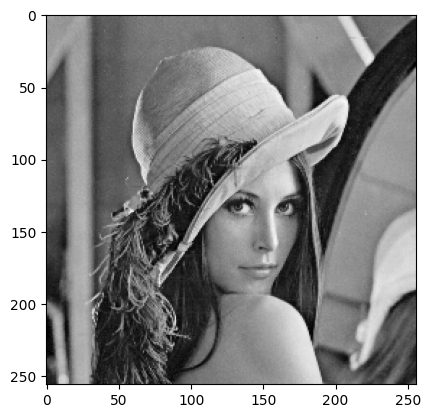

In [5]:
img = plt.imread('data/lena.png')
plt.imshow(img, 'grey')

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [6]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        count = 0 
        for q in numpy.ndindex(size, size):
            x = p[0] + q[0] - n
            y = p[1] + q[1] - n
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]:
                neighborhood_sum += img[x,y]
                count += 1
        if count == size**2: #hier hatte ich vorher count > 0 
            result[p] = neighborhood_sum / count
        else:
            result[p] = 0 #hier war dann = img[p], border war dadurch wesentlich kleiner 
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

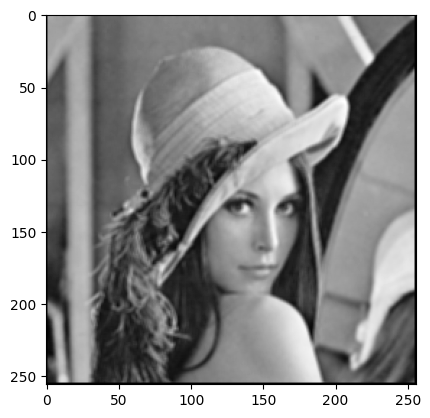

In [7]:
mean3 = meanfilter(img, 3)
plt.imshow(mean3, 'gray')

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/lena_meanfilter5.png`:

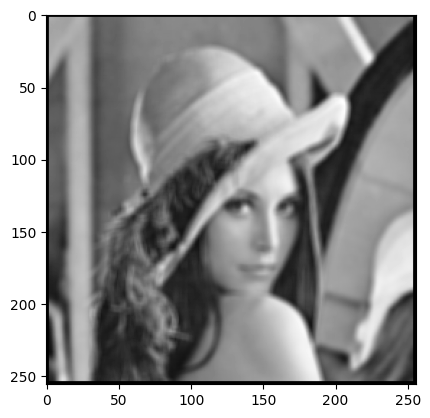

In [8]:
plt.imshow(meanfilter(img,5), 'gray')
# assert (meanfilter(img, 5) == plt.imread('data/lena_meanfilter5.png')).all()

True

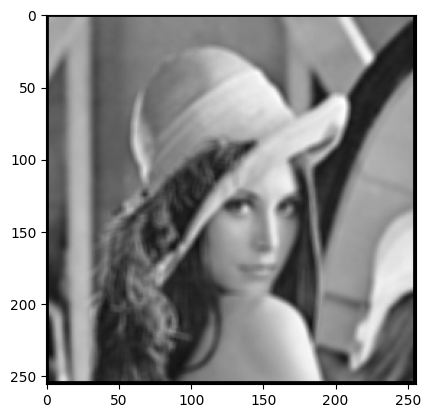

In [9]:
plt.imshow(plt.imread('data/lena_meanfilter5.png'), 'gray')
vorlagem = plt.imread('data/lena_meanfilter5.png')
eigenm = meanfilter(img, 5)
numpy.allclose(vorlagem, eigenm, atol = 1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [10]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size-1)//2
    for p in numpy.ndindex(img.shape):
        werte = list() 
        count = 0
        for q in numpy.ndindex(size, size):
            x = p[0] + q[0] - n
            y = p[1] + q[1] - n
            if 0 <= x < img.shape[0] and 0 <= y < img.shape[1]:
                werte.append(img[x,y])
                count +=1
        if count == size * size: #hier hatte ich vorher count > 0 
            result[p] = sorted(werte)[(size*size - 1)//2]
        else:
            result[p] = 0 #hier war dann = img[p], border war dadurch wesentlich kleiner 
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

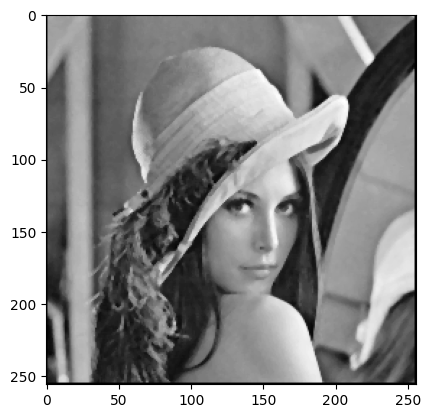

In [11]:
r = medianfilter(img, 3)
plt.imshow(r, 'gray')

Then, compare your result for filter size `5` with the correct result image `data/lena_medianfilter5.png`:

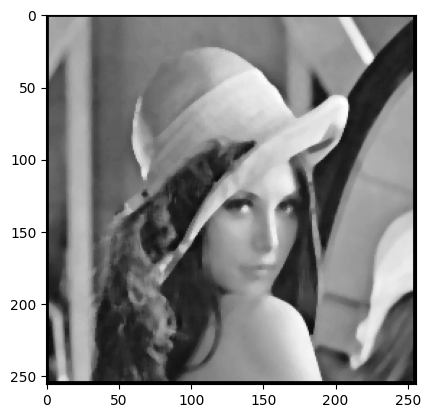

In [12]:
plt.imshow(medianfilter(img, 5), 'gray')

True

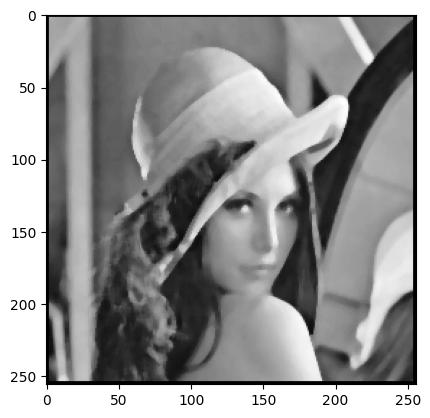

In [13]:
plt.imshow(plt.imread('data/lena_medianfilter5.png'), 'gray')
vorlage = plt.imread('data/lena_medianfilter5.png')
eigen = medianfilter(img, 5)
numpy.allclose(vorlage, eigen , atol = 1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [14]:
import scipy.ndimage as snd

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

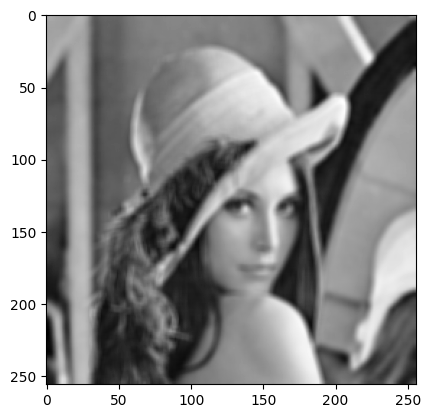

In [15]:
plt.imshow(snd.uniform_filter(img, 5), 'gray')

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

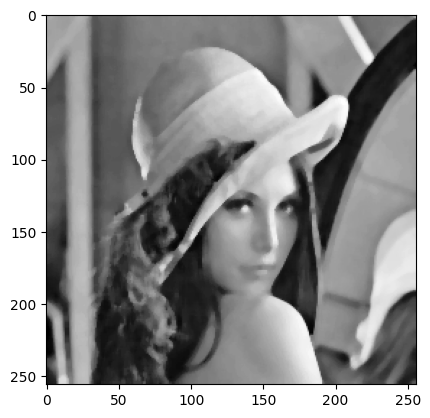

In [16]:
plt.imshow(snd.median_filter(img, 5), 'gray')

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

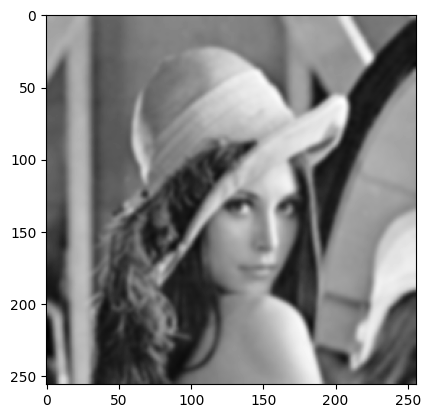

In [22]:
plt.imshow(snd.gaussian_filter(img, 1.5), 'gray')

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

Es gibt keinen breiten Rand bei den vorgegebenen Filtern. -> Es wird also nicht einfach abgschnitten sobald nicht genügend Pixel für eine komplette Filtermaske mehr vorhanden sind.

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [18]:
def fastfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size-1)//2
    for z in numpy.ndindex(img.shape):
        i0 = z[0] - n
        i1 = z[0] + n + 1
        j0 = z[1] - n
        j1 = z[1] + n + 1
        # if 0 <= i0 < z[0] and  0 <= i1 < z[0] and  0 <= j0 < z[1] and  0 <= j1 < z[1]:
        simg = img[i0:i1, j0:j1]
        result[z] = simg.mean()
        #else:
            #result[z] = 0
    return result

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

/tmp/ipykernel_662/1382732080.py:11: RuntimeWarning: Mean of empty slice.
  result[z] = simg.mean()
/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


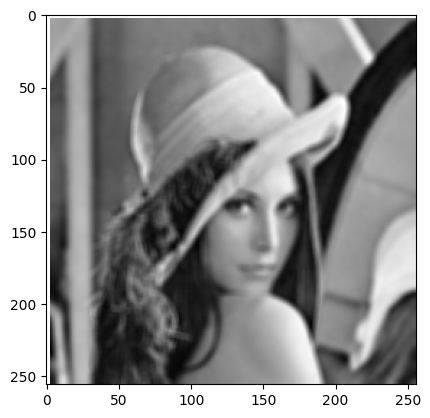

In [20]:
plt.imshow(fastfilter(img, 5), 'gray')

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

In [25]:
%timeit fastfilter(img,9)
%timeit meanfilter(img, 9)

/tmp/ipykernel_662/1382732080.py:11: RuntimeWarning: Mean of empty slice.
  result[z] = simg.mean()
/usr/local/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


461 ms ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.52 s ± 182 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation:

Reduced number of loops leads to significantly lower calculation time of the filter 